Урок 9. Python применение продвинутых методов
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

Mobile Games AB Testing with Cookie Cats

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats import proportion
from statsmodels.stats.meta_analysis import effectsize_smd
from statsmodels.stats.power import tt_ind_solve_power, zt_ind_solve_power

from math import asin
import plotly.graph_objects as go
import plotly.express as px
from tqdm import tqdm_notebook
from typing import Union

In [38]:
data = pd.read_csv('gb_sem_9_hw.csv')

In [39]:
data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [41]:
data.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [42]:
#проверка дублей id
data.userid.value_counts()

116        1
6632278    1
6658202    1
6658194    1
6658134    1
          ..
3347358    1
3347337    1
3346992    1
3346979    1
9999861    1
Name: userid, Length: 90189, dtype: int64

In [60]:
data.userid.nunique()

90189

In [43]:
A = data.version[data.version == "gate_30"].describe()
B = data.version[data.version == "gate_40"].describe()

print(A)
print(B)

count       44700
unique          1
top       gate_30
freq        44700
Name: version, dtype: object
count       45489
unique          1
top       gate_40
freq        45489
Name: version, dtype: object


In [54]:
#!pip install distfit -U
from distfit import distfit

# Initialize for discrete distribution fitting
dfit = distfit()

# Run distfit to and determine whether we can find the parameters from the data.
result = dfit.fit_transform(treatment.time)

NameError: name 'treatment' is not defined

In [45]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import kstest

In [47]:
mannwhitneyu(data[data.version == "gate_30"].sum_gamerounds,
             data[data.version == "gate_40"].sum_gamerounds)

MannwhitneyuResult(statistic=1024331250.5, pvalue=0.05020880772044255)

In [50]:
ttest_ind(data[data.version == "gate_30"].sum_gamerounds,
          data[data.version == "gate_40"].sum_gamerounds)

Ttest_indResult(statistic=0.8910426211362967, pvalue=0.37290868247405207)

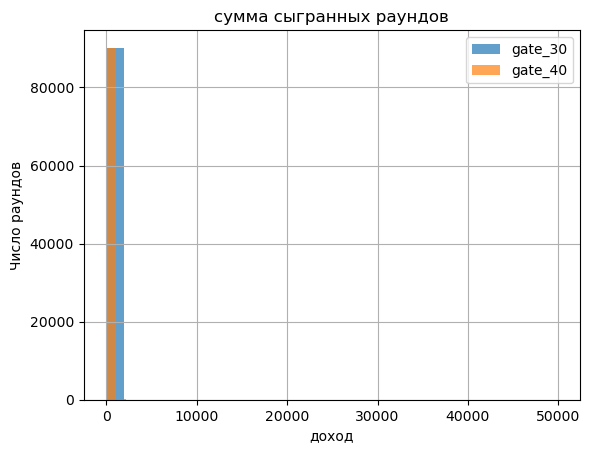

In [66]:
data.sum_gamerounds.hist(bins = 25, alpha =0.7, label='gate_30')
data.sum_gamerounds.hist(bins = 45, alpha =0.7, label='gate_40')
plt.title('сумма сыгранных раундов')
plt.xlabel('раунды')
plt.ylabel('Число пользователей')
plt.legend();

In [56]:
data.head(2)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False


Итоговый вывод
исходя из вышепроведённых тестов можно сделать выводы что:
данные нормальные, выбросы отсутствуют
различия в данных практически отсутствуют, возможно данные собранны некоректно или изменения не влияют на отношение пользователей к продукту